#About Data
## *This dataset, sourced from the esteemed National Institute of Diabetes and Digestive and Kidney Diseases, holds a fascinating objective: to foresee, through diagnostic measurements, whether a patient grapples with diabetes. A unique aspect of this study is its exclusive focus on female patients, ***aged 21*** and above, hailing from the rich Pima Indian heritage. It's a captivating exploration into a specific demographic, shedding light on a critical health concern.*

1. **Pregnancies:**
  This column informs us about the number of times a patient has experienced pregnancy.

2. **Glucose:**
  The Glucose column measures the patient's blood sugar level after they consume glucose, giving insights into their blood sugar levels.

3. **BloodPressure:**
 This column represents the patient's blood pressure reading, specifically the pressure in the arteries when the heart is at rest. The measurement is in millimeters of mercury (mm Hg).

4. **SkinThickness:**
 The SkinThickness column indicates the thickness of the skinfold on the triceps in millimeters (mm), providing information about the patient's skin health.

5. **Insulin:**
 This column shows the level of insulin in the patient's blood after a 2-hour period, measured in micro-units per milliliter (mu U/ml). It reveals the patient's insulin response.

6. **BMI (Body Mass Index):**
  BMI is a measure of body fat based on the patient's height and weight. It gives an indication of the patient's overall body composition.

7. **DiabetesPedigreeFunction:**
 This column measures the patient's likelihood of having diabetes based on their family history of the disease. It helps to understand the genetic predisposition to diabetes.

8. **Age:**
 The Age column tells us the age of the patient in years, providing demographic information.

9. **Outcome:**
 The Outcome column is a binary indicator that reveals whether the patient has diabetes or not. A value of 1 means they have diabetes, while 0 means they do not have diabetes. It's a crucial column indicating the target variable for prediction and analysis.

In [51]:
#Important Library in this project
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
#Reading data
df_d = pd.read_csv('/content/Project 2 MeriSKILL.zip')

In [53]:
#The shadow data
diab = pd.read_csv('/content/Project 2 MeriSKILL.zip')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
#Data Description
styled_df = diab.describe().style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
# 0 Nan Value
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
#cheacking duplicate value
diab.duplicated().sum()

0

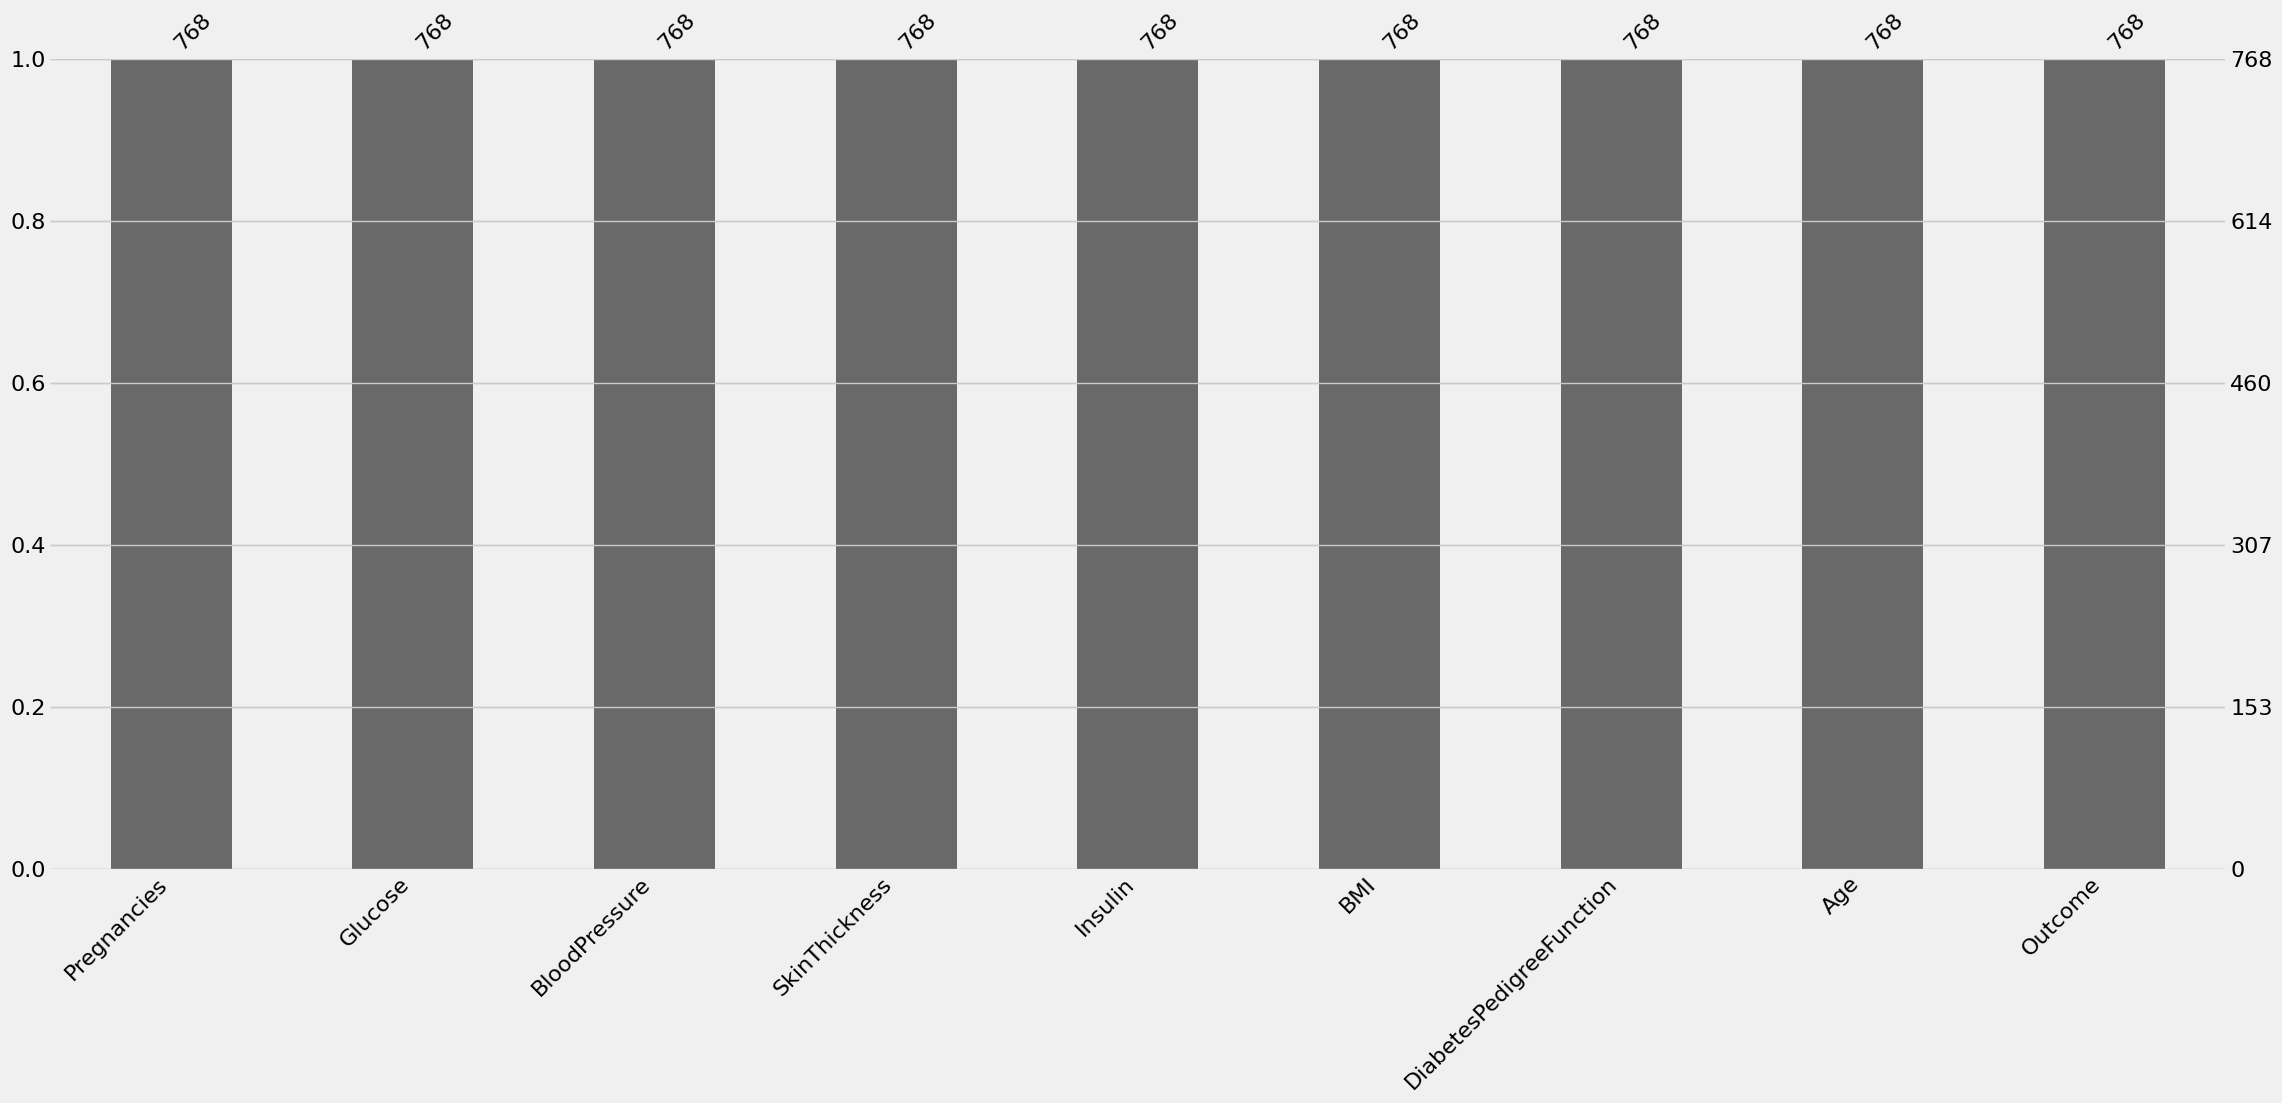

In [57]:
import missingno as msno
msno.bar(diab)
plt.show()

In [58]:
#Data content
styled_df = diab.sample(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.400000,0.207000,27,0
260,3,191,68,15,130,30.900000,0.299000,34,0
745,12,100,84,33,105,30.000000,0.488000,46,0
244,2,146,76,35,194,38.200000,0.329000,29,0
442,4,117,64,27,120,33.200000,0.230000,24,0


# ***Data Visualization***

#`Correlation Between Attributes`

In [59]:
plt.style.use('fivethirtyeight')

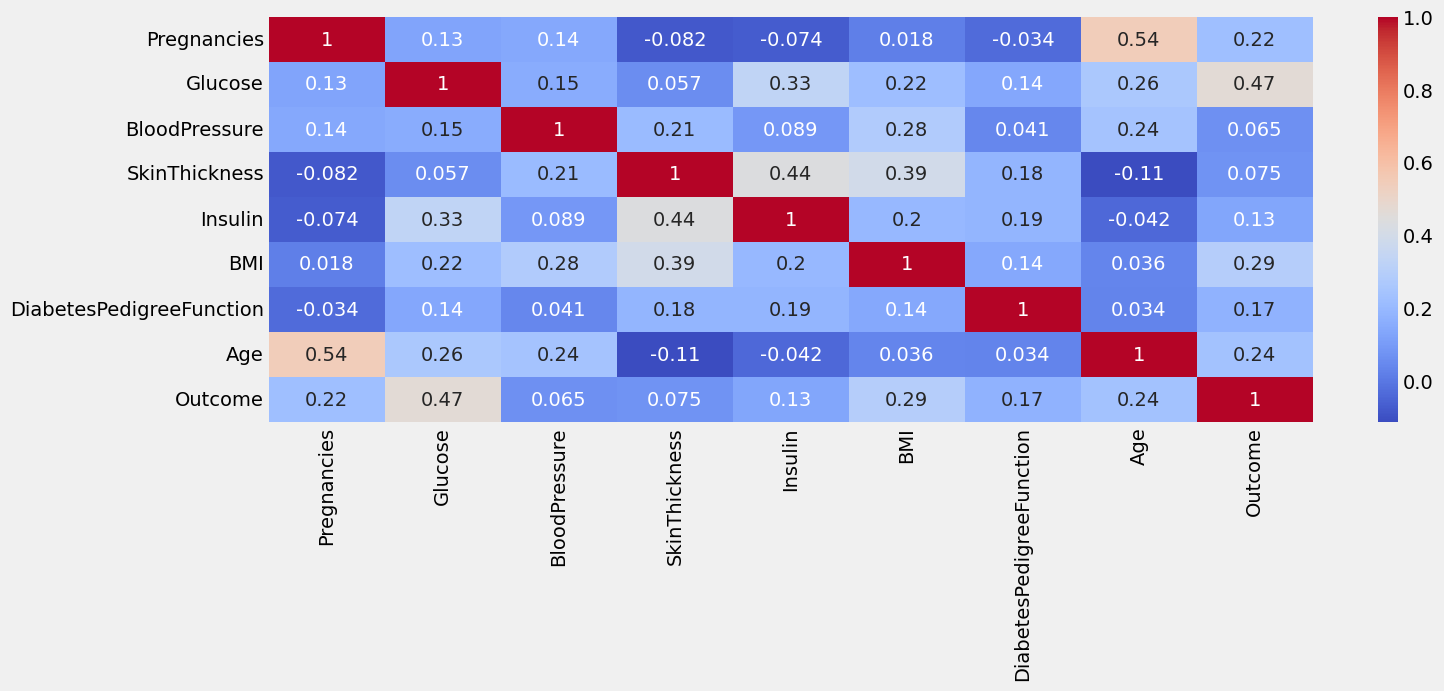

In [60]:
plt.figure(figsize=(15,5))
sns.heatmap(diab.corr(), cmap="coolwarm", annot=True)
plt.show()

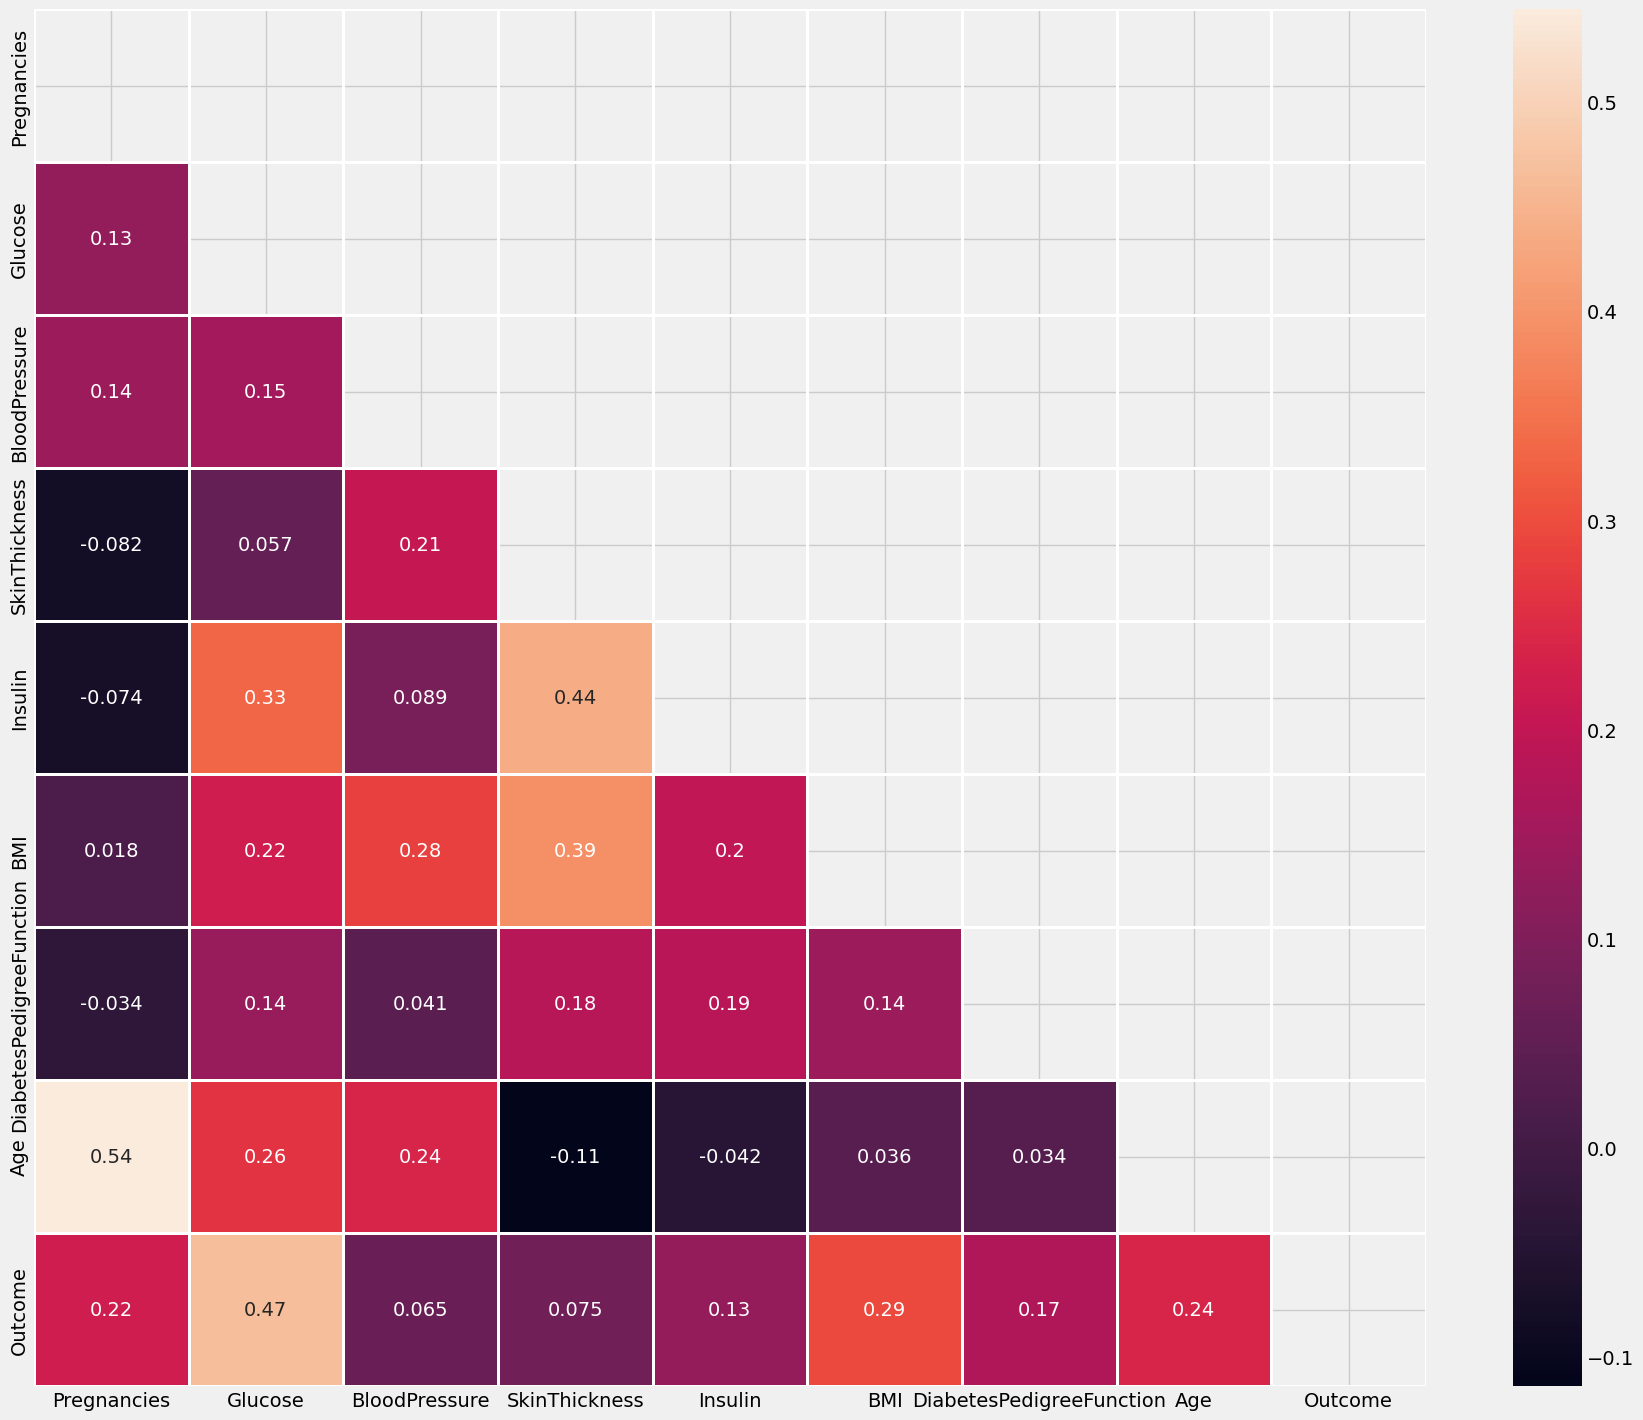

In [61]:
plt.figure(figsize=(20, 17))
matrix = np.triu(diab.corr())
sns.heatmap(diab.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")
plt.show()

<Figure size 2000x1700 with 0 Axes>

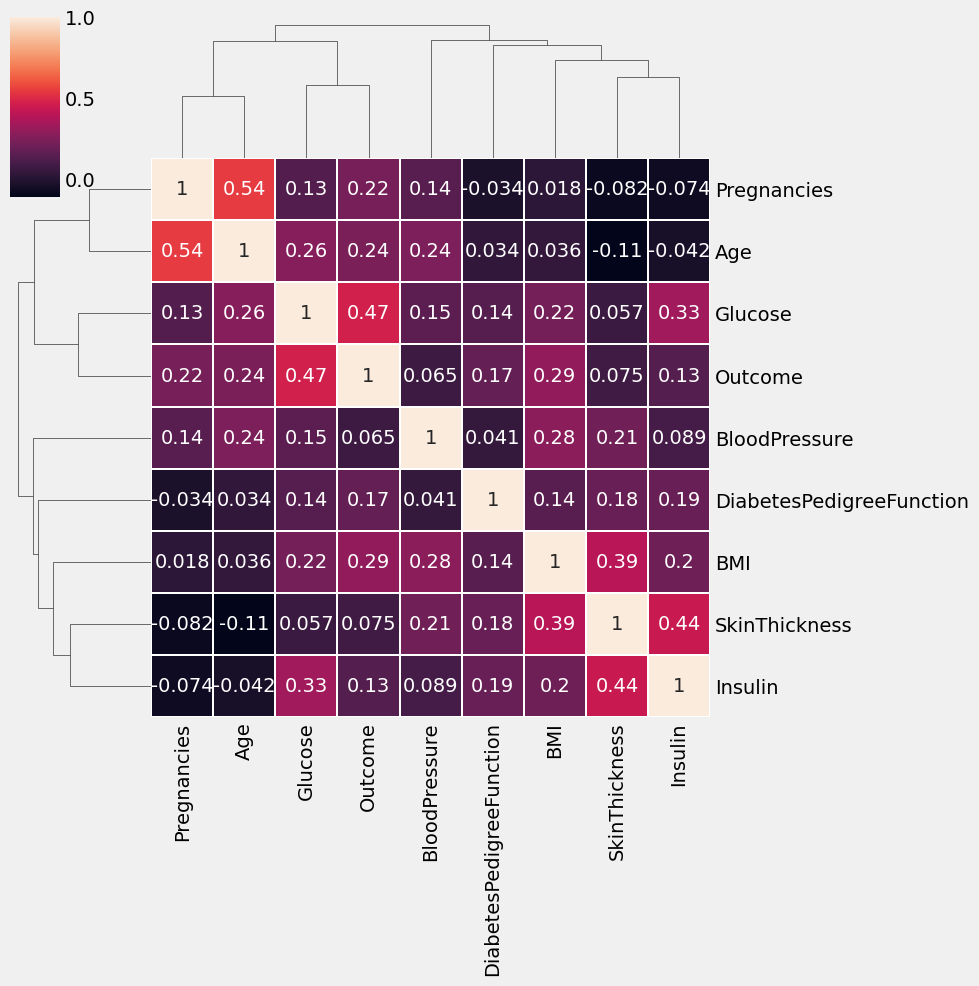

In [62]:
plt.figure(figsize=(20,17))
sns.clustermap(diab.corr(), annot=True, linewidths=0.1)
plt.show()

1. **Age and Pregnancies:**
   - The ***'Age'*** column represents the age of female patients.
   - The ***'Pregnancies'*** column indicates the number of times a female patient has been pregnant.
   - These two columns are moderately positively correlated, which is expected since as a woman ages, the likelihood of experiencing pregnancies typically increases.

2. **Glucose and Outcome:**
   - The ***'Glucose'*** column measures a patient's blood sugar level after consuming glucose.
   - The ***'Outcome'*** column indicates whether a patient has diabetes (**1** for diabetes, **0** for no diabetes).
   - These columns are positively correlated, suggesting that higher glucose levels may significantly contribute to the presence of diabetes.

3. **BMI and SkinThickness:**
   - The ***'BMI'*** (Body Mass Index) column is a measure of body fat based on height and weight.
   - The ***'SkinThickness'*** column indicates the thickness of the skinfold on the triceps.
   - These columns are positively correlated, which is expected since skin thickness contributes to the overall BMI, reflecting the relationship between body fat and skin thickness.

In [63]:
#Fatching how many zero values of each column
D = []
for i in diab.columns:
  D.append(diab[diab[i]==0].shape[0])

pd.Series(D,index=diab.columns)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#Explanation of the identified problems with the data:

**Zero Values in Certain Columns:**
   - The columns ***'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'***, and ***'BMI'*** have a considerable number of zero values.
   - It's highly unlikely for these vital health indicators to have exact zero values; this suggests that null values might have been replaced with zeros during data preprocessing.

**Specific Zero Values:**
   - In the 'Glucose' column, there are ***5*** rows with zero values, indicating potential anomalies or missing data points.
   - In the 'BloodPressure' column, there are ***35*** rows with zero values, which is improbable and might be due to data handling.
   - The 'SkinThickness' column has ***227*** rows with zero values, implying missing or erroneous data.
   - In the 'Insulin' column, a substantial ***374*** rows have zero values, which is unlikely for insulin levels and might be due to missing data or data imputation.
   - The 'BMI' column shows ***11*** rows with zero values, which is unexpected for a body mass index and could be indicative of data issues or missing values.

***The IterativeImputer class is a data imputation technique that aims to fill in missing values in a dataset. It uses a machine learning model to estimate the missing values based on the other features in the dataset.***

***by enabling IterativeImputer from sklearn.experimental, gain access to a powerful imputation technique that utilizes machine learning algorithms to estimate missing values, thus helping to preprocess the data and make it ready for further analysis or modeling.***

In [64]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#column with zero values
col_with_zero = ['Insulin', 'SkinThickness', 'BloodPressure', 'BMI', 'Glucose']

#Replacing Zero with Nan Value
diab[col_with_zero] = diab[col_with_zero].replace(0, np.nan)

#Using ItrativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputer = pd.DataFrame(imputer.fit_transform(diab[col_with_zero]), columns=col_with_zero)
df_imputer = df_imputer.astype('int64')
diab[col_with_zero] = df_imputer

In [65]:
#Checking data after imputation and before imputation
pd.DataFrame(data =[df_d.mean(),diab.mean()], index= ['Before Imputation', 'After Imputation'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Before Imputation,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
After Imputation,3.845052,121.644531,72.355469,28.631510,151.549479,31.993490,0.471876,33.240885,0.348958


*Univariate analysis ⏩ involves examining a single variable in isolation to understand its distribution and characteristics. In this case, we're focusing on the ***'Outcome'*** variable, which indicates whether a patient has diabetes or not (***1*** for diabetes, ***0*** for no diabetes).*

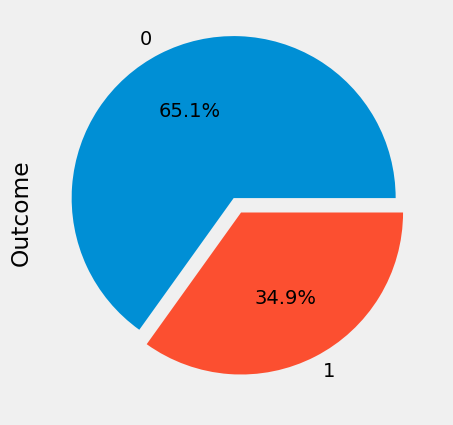

In [66]:
#Checking the distribution of Outcome variable
plt.figure(figsize=(30,5))
diab['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1,0])
plt.show()

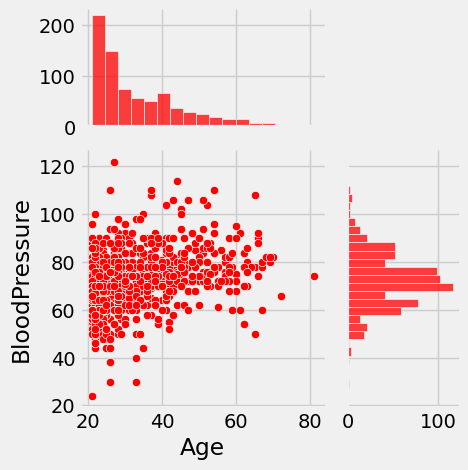

In [67]:
#Checking correlation Age And BloodPressure
sns.jointplot(data=diab, x="Age", y="BloodPressure", height=5, ratio=2, marginal_ticks=True, marker='o', color='red')
plt.show()

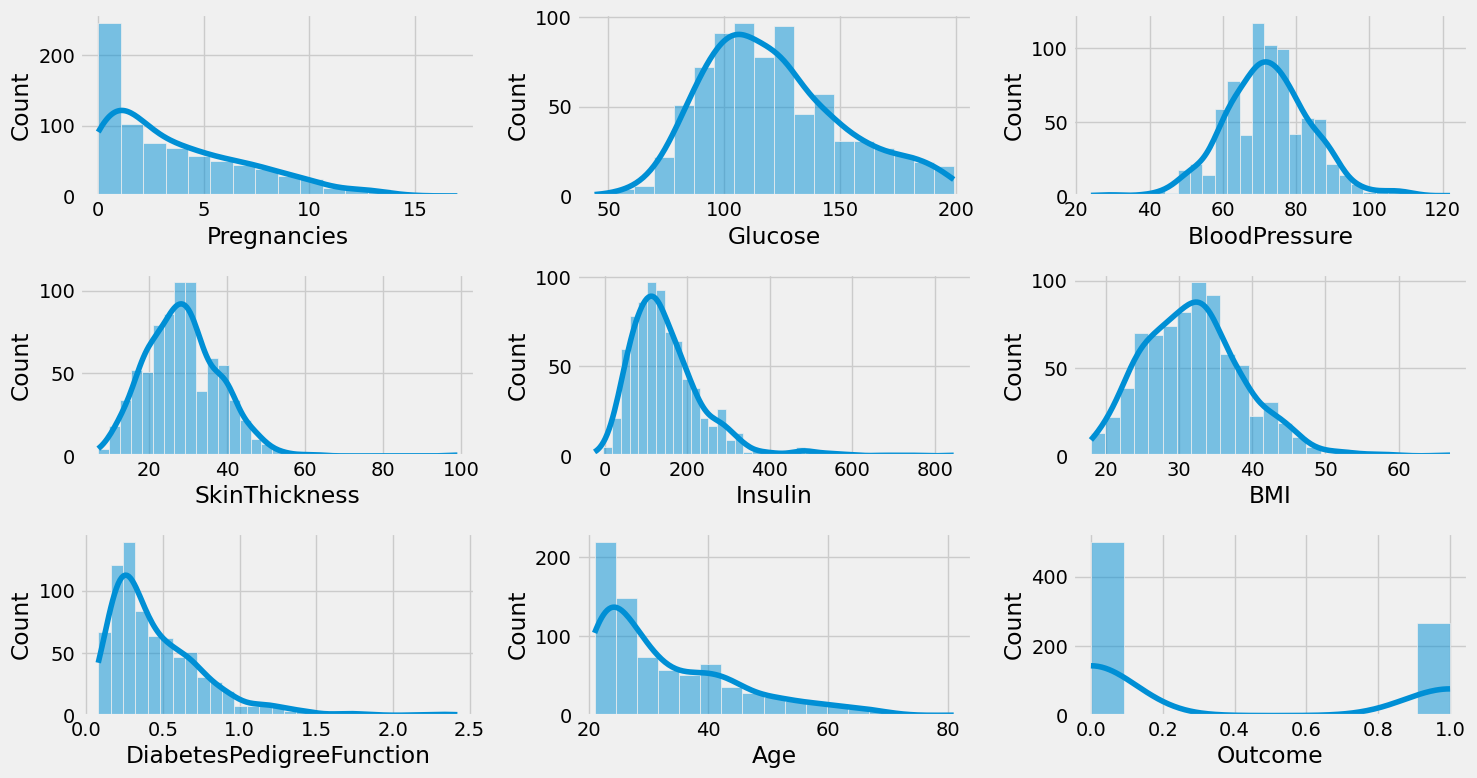

In [68]:
# checking the distribution of Independent Variable
fig, ax = plt.subplots(ncols=3,nrows=3, figsize=(15,8))

# Flatten the axes array to simplify indexing
ax = ax.flatten()

#Itrating over each column and corresponding axes
for i, (col,axes) in enumerate(zip(diab.columns, ax)):
  # Plot the Histogram for the current column using seaborn
  sns.histplot(data=diab, x=col, ax=axes, kde=True)
# adjust the spacing between subplots
fig.tight_layout()
plt.show()


1. **Age Group Insight:**
    The dataset mainly includes females aged ***20 to 30.***

2. **Glucose Distribution:**
    'Glucose' levels exhibit a normal distribution.

3. **SkinThickness Outlier:**
    There's an unusual 'SkinThickness' ***value of 99***, standing out from the rest.

4. **Insulin Outliers:**
    'Insulin' column contains outliers in the range of ***700 to 800***, but these levels are possible and valid, so they're not removed.

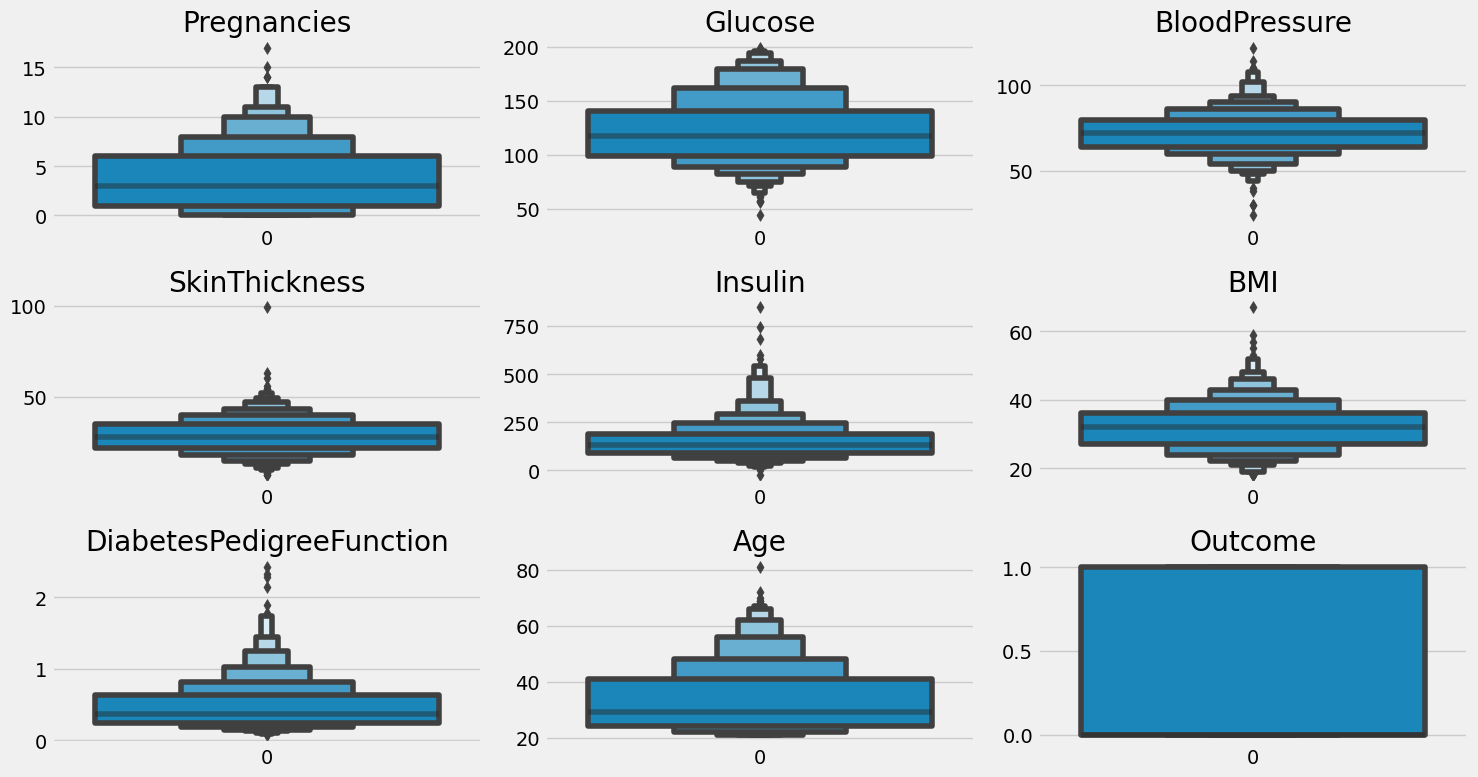

In [69]:
# Finding Outliers
fig, ax = plt.subplots(ncols=3,nrows=3, figsize=(15,8))

# Flatten the axes array to simplify indexing
ax = ax.flatten()

#Itrating over each column and corresponding axes
for i, (col,axes) in enumerate(zip(diab.columns, ax)):
  # Plot the boxplot for the current column using seaborn
  sns.boxenplot(data=diab[col], ax=axes)
  axes.set_title(col) # setting the column name as given

# adjust the spacing between subplots
fig.tight_layout()
plt.show()

#`Since all outliers are possible to have, we cannot remove them`

##***Bivariate Analysis***

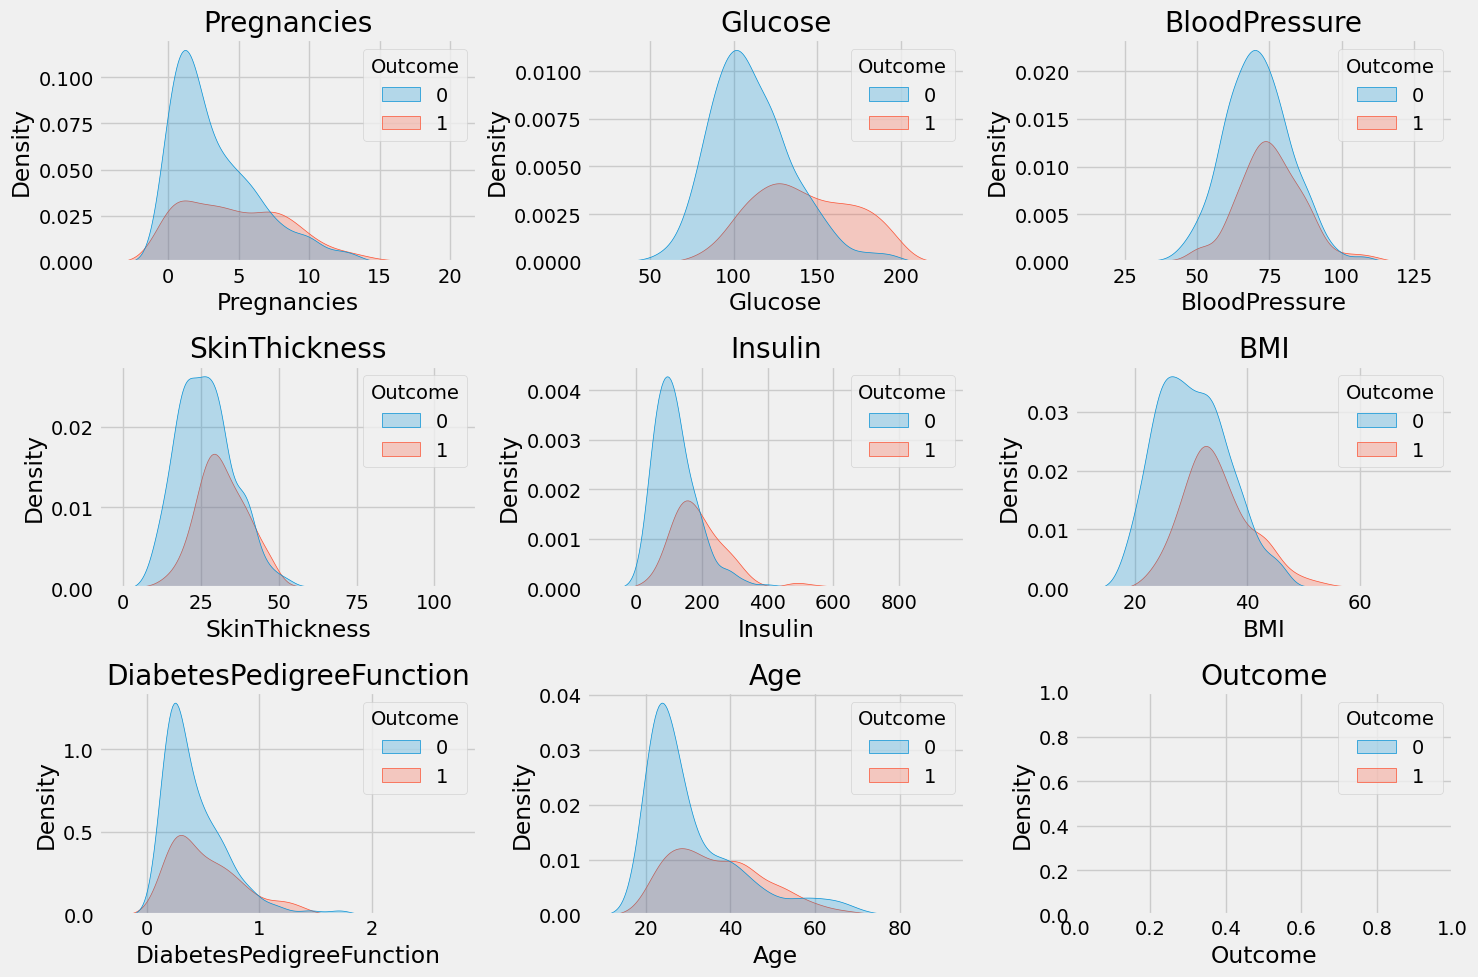

In [70]:
# checking the distribution of Independent Variable
fig, ax = plt.subplots(ncols=3,nrows=3, figsize=(15,10))

# Flatten the axes array to simplify indexing
ax = ax.flatten()

#Itrating over each column and corresponding axes
for i, (col,axes) in enumerate(zip(diab.columns, ax)):
  # Plot the KDE plot for the current column using seaborn with 'hue' parameter
  sns.kdeplot(data=diab, x=col, hue= 'Outcome', ax=axes, fill=True)
  axes.set_title(col) # setting the column name as given

# adjust the spacing between subplots
fig.tight_layout()
plt.show()

1. **Age and Diabetes:**
    Being under ***40*** significantly reduces the chance of diabetes diagnosis.

2. **Blood Pressure and Diabetes:**
    Keeping blood pressure below ***110*** lowers diabetes risk.

3. **Glucose and Diabetes (for Females):**
    Females with glucose below ***140 mg/dL*** have a lower risk of diabetes.

4. **Insulin and Diabetes (for Females):**
    Females with insulin below ***60 mg/dL*** have a lower diabetes risk.

5. **SkinThickness and Diabetes (for Females):**
    Females with SkinThickness below ***25 mm*** face a reduced diabetes risk.

6. **BMI and Diabetes:**
    BMI over ***40*** increases the likelihood of diabetes.

<Figure size 2000x1500 with 0 Axes>

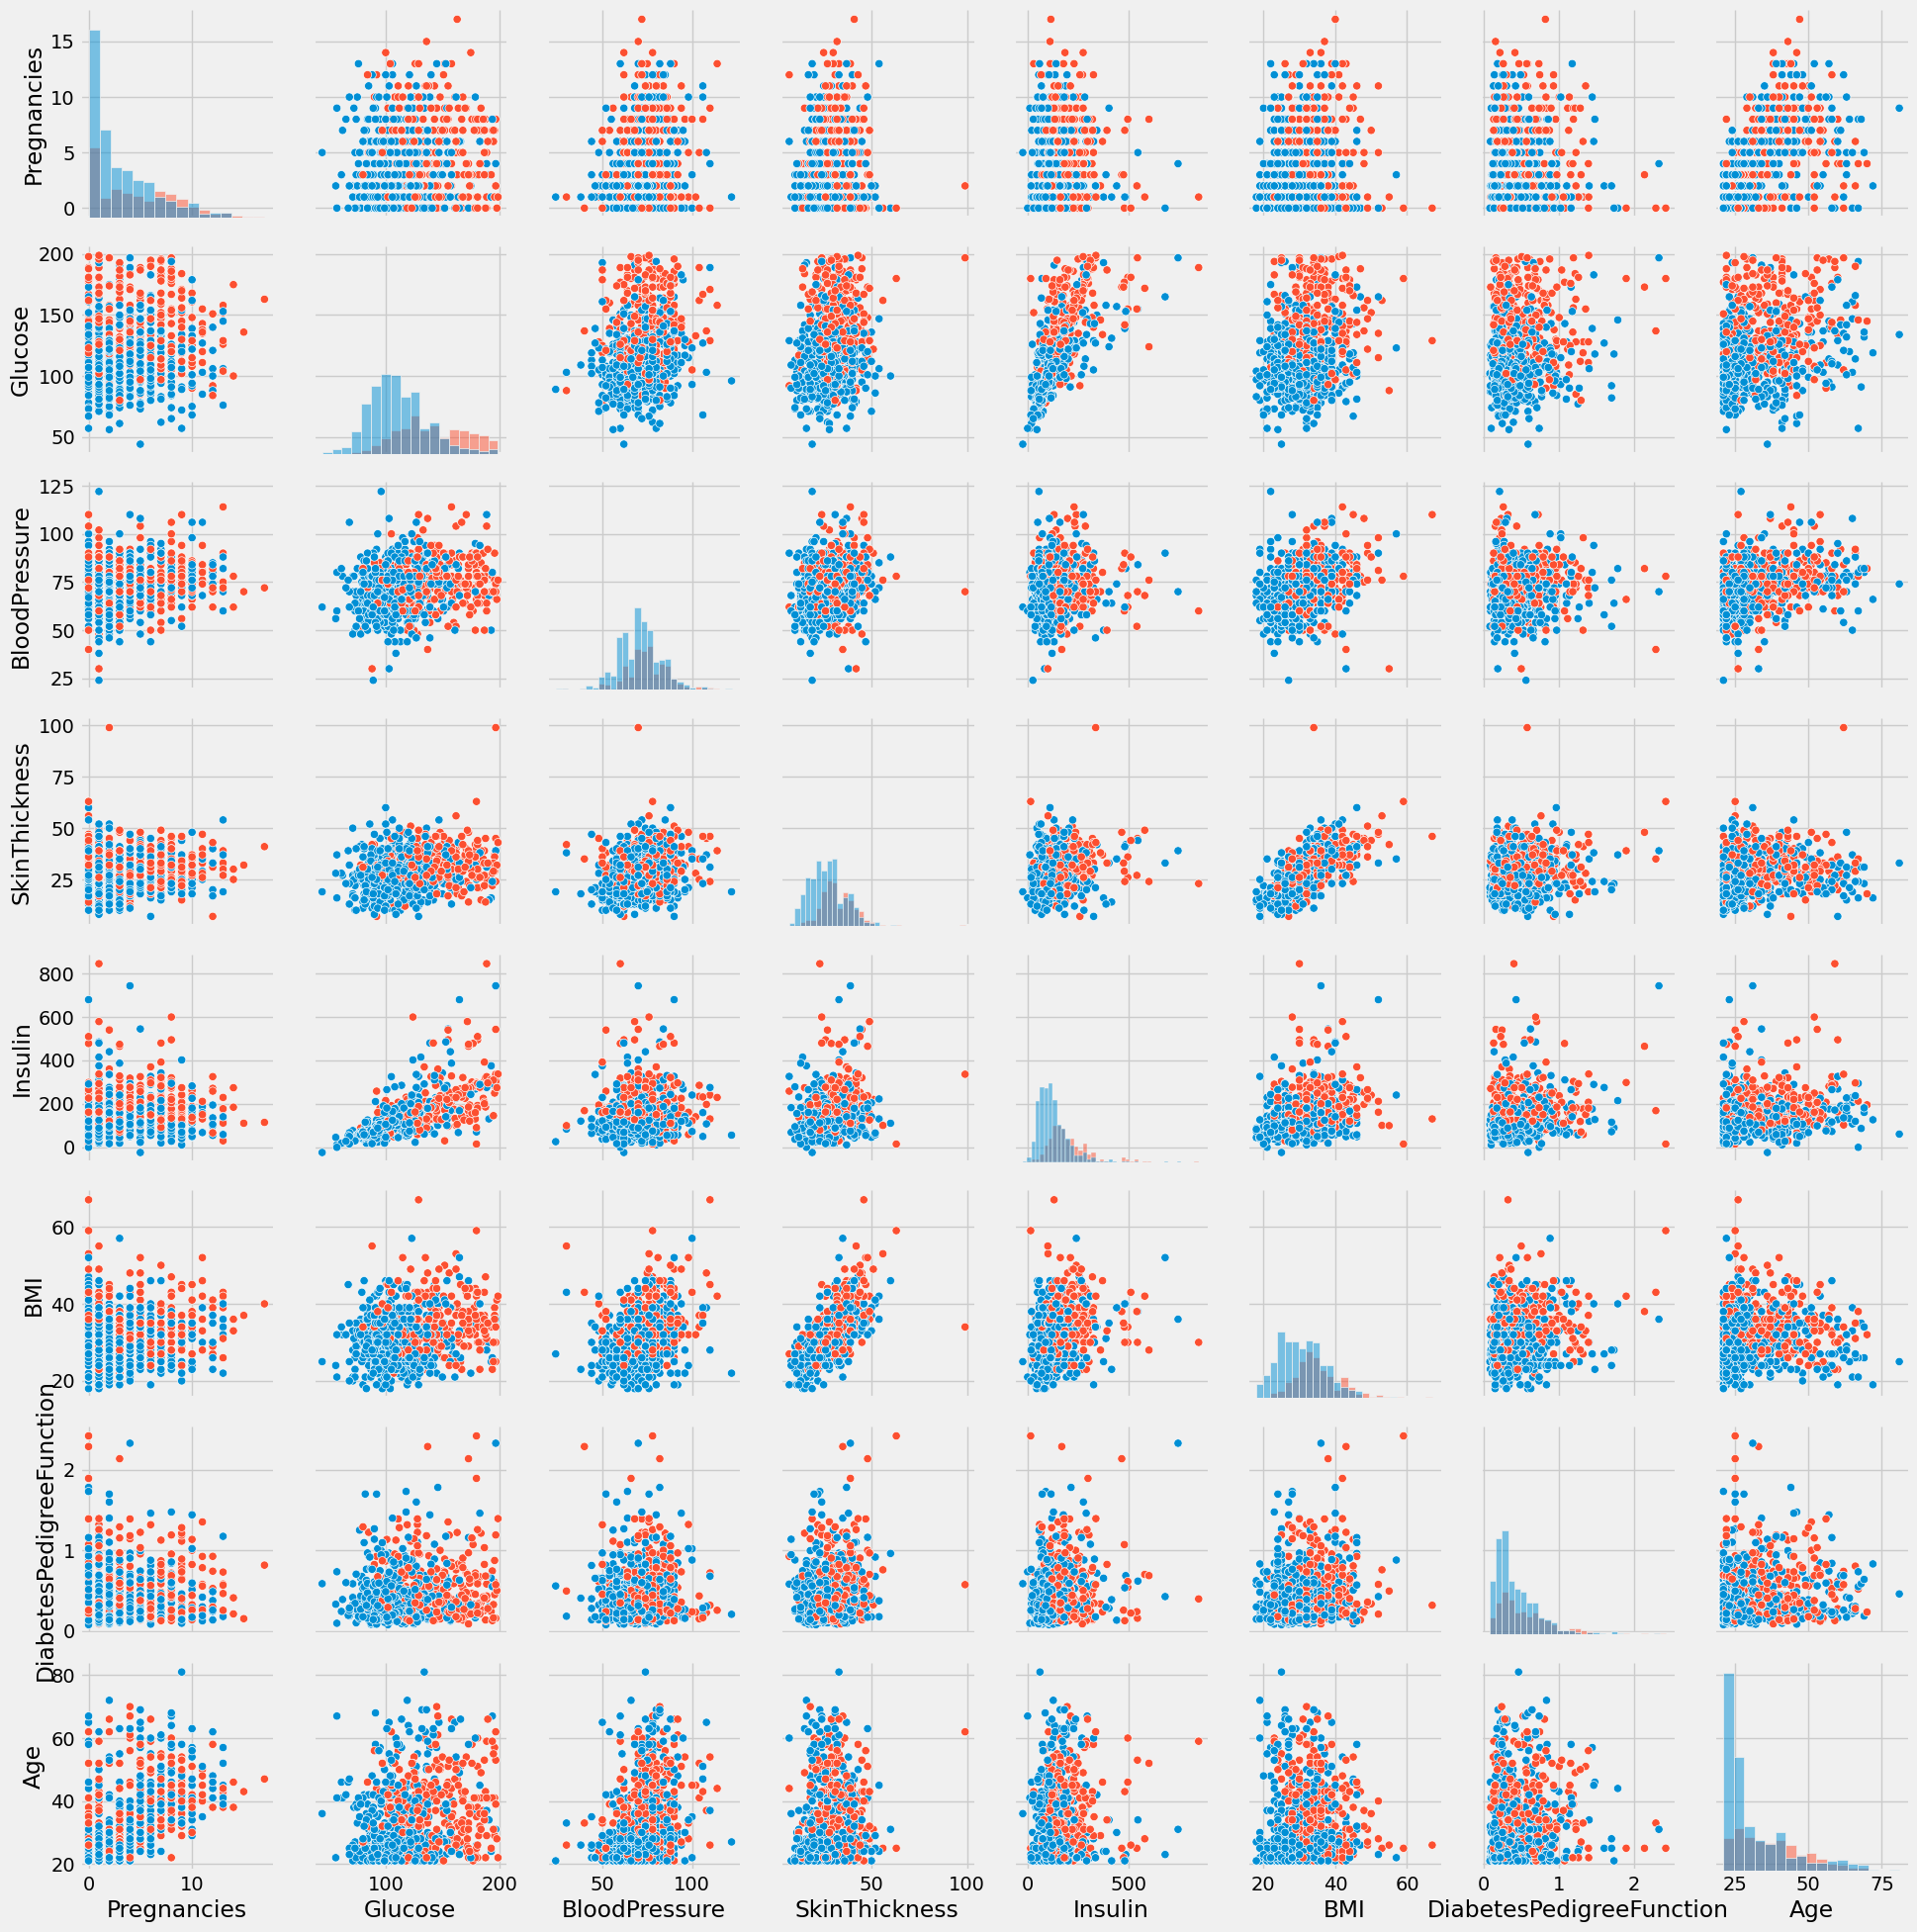

In [71]:
plt.figure(figsize=(20,15))
p = sns.PairGrid(data= diab, hue='Outcome')
p.map_offdiag(sns.scatterplot)
p.map_diag(sns.histplot)
plt.show()


***The grid plot highlights Glucose, BMI, and Age as the primary influential features in the analysis. These variables play a pivotal role in understanding and deriving insights from the dataset.***

#Conclusion
- **Pregnancies:**
    The number of pregnancies doesn't influence the diagnosis of diabetes.

- **Glucose:**
    A normal post-glucose blood sugar level is below **140 mg/dL**.

- **BloodPressure:**
    Normal blood pressure at rest is below **120 mmHg**.

- **SkinThickness:**
    Normal skinfold thickness on the triceps is less than **25 mm**.

- **Insulin:**
    Normal insulin levels after a 2-hour period are below **30 µU/mL**.

- **BMI:**
    BMI in the range of **18.5 to 30** is considered normal.
    **BMI** over **30** indicates obesity, a significant factor contributing to diabetes.

#  **Diabetes Risk Factors:**
    Higher levels of Glucose, BMI, and DiabetesPedigreeFunction significantly increase the likelihood of having diabetes.

***And that's a wrap! My first deep dive into Diabetes data - an exciting journey. If I've missed or misinterpreted anything, do share. Your feedback matters as I navigate this new realm. Cheers to your future notebooks! I'm all ears, all eyes. Let's keep the data tales spinning! 🚀🌿***